In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g5KEj4jDSTuUNnEYblEHGD7kQOC1TaqPaMFAfQo4UeOvSPzc1xrSgI
Mounted at /content/drive


# I. PREPROCESAMIENTO

Iniciaremos en este apartado con el procesamiento, el objetivo es crear una bolsa de palabras. Se hará uso de algunas librerías clásicas que nos ofrece Python en esta labor tales como nltk, sklearn, entre otras. Una vez tengamos nuestra bolsa de palabras se pasará al segundo apartado en el cual construiremos el modelo propiamente dicho.


## 1.1. Cargamos las librerías y la base de datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
nltk.download('stopwords')  #Elimina las palabras irrelevantes
from nltk.corpus import stopwords
#from nltk import word_tokenize
from nltk.stem import SnowballStemmer
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import string
from string import punctuation
import pandas as pd
import os
from collections import Counter
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
#Reubicamos el directorio y importamos el dataset

#df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Barreras Burocráticas/Barreras.xlsx')
df = pd.read_excel('/content/Barreras.xlsx')
df


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,DECISIÓN,EXPRESIÓN CLAVE
0,BARRERA BUROCRÁTICA,por haber desconocido del silencio administra...
1,NO ES BARRERA BUROCRÁTICA,la exigencia\nde ser titular de una licencia d...
2,BARRERA BUROCRÁTICA,los siguientes requisitos impuestos\npor la Mu...
3,BARRERA BUROCRÁTICA,los siguientes cobros impuestos\npor la Munici...
4,NO ES BARRERA BUROCRÁTICA,la denuncia presentada por América Móvil Perú ...
...,...,...
121,BARRERA BUROCRÁTICA,las siguientes medidas impuestas por la Munic...
122,NO ES BARRERA BUROCRÁTICA,las siguientes medidas impuestas por el Minist...
123,BARRERA BUROCRÁTICA,el desconocimiento del silencio administrativo...
124,NO ES BARRERA BUROCRÁTICA,Se declara que la exigencia de contar con term...


## 1.2. Comandos y funciones que se usarán constantemente

In [ ]:
patron = re.compile(r'\W+')   #Removerá "" y otras que dificultan la lectura alpha numérica
stemmer = SnowballStemmer('spanish')
def clean_text(doc):
     patron = re.compile(r'\W+') 
     doc=patron.split(doc.lower())
     ''''Usamos isalpha para quedarnos solo con alphanuméricos
     Previamente debemos usar el patrón porque isalpha no detectará por ej."Arequipa"
     como alfa numérico'''
     doc= [word for word in doc if word.isalpha()]
     tokens=[word for word in doc if not word in set(stopwords.words('spanish'))]
     tokens = [word for word in tokens if len(word) > 1]
     return tokens

## 1.3. Modificación de la base de datos para fácil manejo

In [ ]:
df=df.rename(columns={'EXPRESIÓN CLAVE':'EXPRESIÓN'})





## 1.4. Visualización de datos por separado (Barreras v.s no Barreras)

### 1.4.1. Separación de la data entre barreras y no barreras

In [ ]:

"""2. SEPARAMOS LAS BARRERAS DE LAS NO BARRERAS PARA VISUALIZAR"""
num=0

barreras=[]
no_barreras=[]
for i in df.DECISIÓN:
    if i=="BARRERA BUROCRÁTICA": 
        a=df.EXPRESIÓN[num]
        tokens=clean_text(a)
        barreras.append(tokens)
        num+=1    
    if i=="NO ES BARRERA BUROCRÁTICA":
        b=df.EXPRESIÓN[num]
        tokens=clean_text(b)
        no_barreras.append(tokens)
        num+=1              #Al final añadimos un número, recordar que se cuenta desde cero

        
barreras_texto=""
for i in barreras:
    for j in i:
        barreras_texto=barreras_texto+ " " +j 
    
no_barreras_texto=""
for i in no_barreras:
    for j in i:
        no_barreras_texto=no_barreras_texto+ " " +j  


### 1.4.2. Generación de Nube de Palabras.

In [ ]:

word_barrera = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5).generate(barreras_texto)
word_barrera.to_file("barreras126.png") #Guardamos la imagen generada


In [ ]:
word_no_barrera = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5).generate(no_barreras_texto)
word_no_barrera.to_file("nobarreras126.png") #Guardamos la imagen generada

In [ ]:
"""from google.colab import files
no_barrera_png = files.upload()
barrera_png = files.upload()
Gauss=files.upload()"""

Saving gauss.png to gauss.png


In [ ]:
!ls

barreras126.png  drive		    nobarreras.png
barreras.png	 nobarreras126.png  sample_data


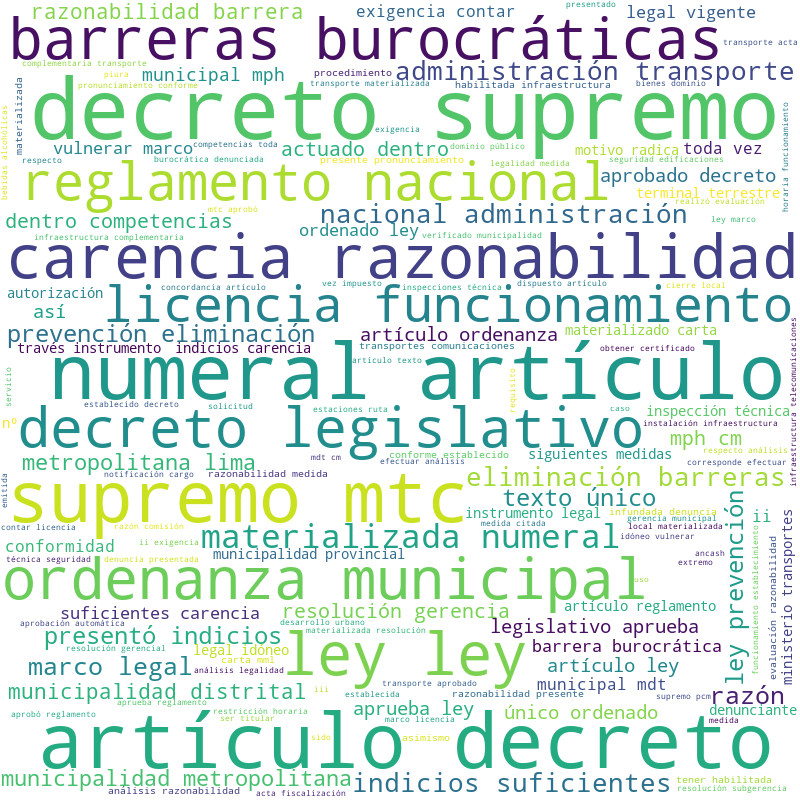

In [ ]:
from IPython.display import Image
Image('nobarreras126.png', width=300, height=300)


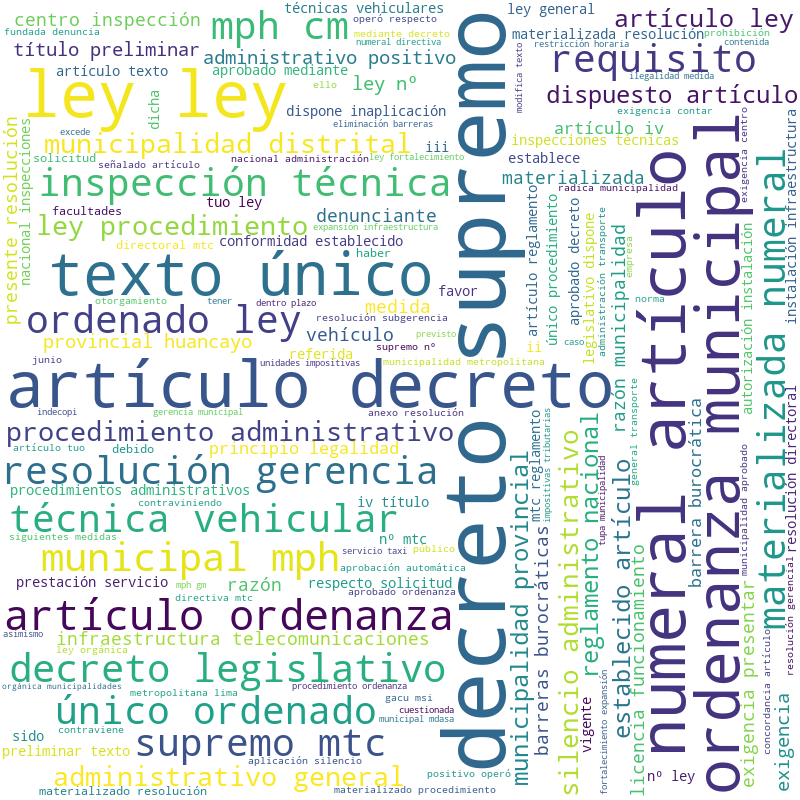

In [ ]:
Image('barreras126.png', width=300, height=300)

### 1.4.3. Obtención de dataframe para contar palabras
Adicionalmente a la nube de palabras, contar las palabras más frecuentes en 
cada caso (barrera v.s no barrera) nos ayudará a entender mejor cada caso.

In [ ]:
"""Contamos"""
num=0
barrera_tokens=[]
no_barrera_tokens=[]
for i in barreras:
    for j in i:
        barrera_tokens.append(j)
        
for i in no_barreras:
    for j in i:
        no_barrera_tokens.append(j)

contador_barreras=Counter(barrera_tokens)
contador_no_barreras=Counter(no_barrera_tokens)

In [ ]:
df_bar = pd.DataFrame.from_dict(contador_barreras, orient='index').reset_index() #reset_index creará un nuevo índice diferente a las columnas
df_bar.columns=["Palabra_Barrera", "Valor"]
df_no_bar = pd.DataFrame.from_dict(contador_no_barreras, orient='index').reset_index() #reset_index creará un nuevo índice diferente a las columnas
df_no_bar.columns=["Palabra_NO_Barrera", "Valor"]
df_bar=df_bar.sort_values("Valor", ascending=False)
df_no_bar=df_no_bar.sort_values("Valor", ascending=False)


In [ ]:
"""Veamos"""
print(df_bar.head(15))
print(df_no_bar.head(15))

    Palabra_Barrera  Valor
100        artículo    238
118             ley    227
19    municipalidad    130
101         decreto    121
179      resolución    119
62        ordenanza    104
164         numeral     95
163   materializada     89
103             mtc     87
222       exigencia     77
61    procedimiento     71
63        municipal     71
3    administrativo     70
102         supremo     67
64              mph     66
    Palabra_NO_Barrera  Valor
51                 ley    143
35            artículo    142
45             decreto    103
178      materializada     78
32       municipalidad     75
126      razonabilidad     72
21           ordenanza     72
46             supremo     65
107         resolución     63
92             numeral     61
41          transporte     58
0            exigencia     57
47                 mtc     55
22           municipal     54
38          reglamento     52


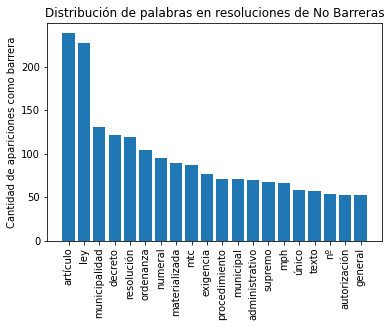

In [ ]:
fig, ax = plt.subplots()
#Colocamos una etiqueta en el eje Y
ax.set_ylabel('Cantidad de apariciones como barrera')
#Colocamos una etiqueta en el eje X
ax.set_title('Distribución de palabras en resoluciones de No Barreras')
plt.xticks(rotation='vertical')  ##Para que las palabras aparezcan en vertical

plt.bar(df_bar["Palabra_Barrera"].head(20), df_bar["Valor"].head(20))

#Finalmente mostramos la grafica con el metodo show()
plt.show()

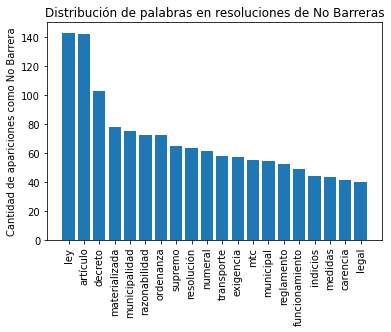

In [ ]:

fig, ax = plt.subplots()
#Colocamos una etiqueta en el eje Y
ax.set_ylabel('Cantidad de apariciones como No Barrera')
#Colocamos una etiqueta en el eje X
ax.set_title('Distribución de palabras en resoluciones de No Barreras')
plt.xticks(rotation='vertical')  ##Para que las palabras aparezcan en vertical

plt.bar(df_no_bar["Palabra_NO_Barrera"].head(20), df_no_bar["Valor"].head(20))

#Finalmente mostramos la grafica con el metodo show()
plt.show()

## 1.5. Tratamiento de la data en general y generación del Bag of Words

### 1.5.1. Lista de expresiones 
En esta parte generaremos una lista de las sumillas de las resoluciones de Indecopi, las cuales irán en una lista que llamaremos expresiones. El orden de estas expresiones es importante, pues posteriormente se asignará un output (barrera o no barrera) al crear el modelo.

In [ ]:
expresiones=[]
for i in range(0,  len(df)):
    a=df['EXPRESIÓN'][i]
    tokens=clean_text(a)
    texto = ' '.join(tokens)
    expresiones.append(texto)

expresiones_tokens= no_barrera_tokens+barrera_tokens
contador_expr=Counter(expresiones_tokens)
print(contador_expr)


Counter({'artículo': 380, 'ley': 370, 'decreto': 224, 'municipalidad': 205, 'resolución': 182, 'ordenanza': 176, 'materializada': 167, 'numeral': 156, 'mtc': 142, 'exigencia': 134, 'supremo': 132, 'municipal': 125, 'transporte': 102, 'reglamento': 101, 'mph': 93, 'procedimiento': 91, 'razonabilidad': 90, 'funcionamiento': 89, 'razón': 84, 'único': 82, 'aprobado': 82, 'administrativo': 81, 'texto': 79, 'nacional': 78, 'legislativo': 78, 'nº': 75, 'medida': 74, 'materializado': 72, 'cm': 72, 'medidas': 72, 'licencia': 71, 'general': 70, 'infraestructura': 69, 'autorización': 68, 'inspección': 66, 'establecido': 65, 'técnica': 63, 'solicitud': 62, 'gerencia': 61, 'barreras': 60, 'presente': 60, 'vehicular': 59, 'burocráticas': 58, 'ordenado': 57, 'ii': 56, 'distrital': 56, 'dispuesto': 54, 'respecto': 53, 'lima': 53, 'conformidad': 52, 'legal': 51, 'contar': 51, 'dentro': 50, 'marco': 50, 'provincial': 48, 'instalación': 48, 'radica': 48, 'telecomunicaciones': 47, 'administración': 46, 'c

### 1.5.2. Dataframe de todos los elementos para mejor análisis

In [ ]:
my_dict = {"Palabra":[],"Barrera":[],"NoBarrera":[]}

"""expresiones_tokens=["Uno", "Dos","bb", "aa", "Uno", "Uno", "Uno", "Uno", "Dos"]
barrera_tokens=["Uno", "bb","Uno"]
no_barrera_tokens=["Dos", "aa", "Uno", "Uno", "Uno", "Dos"]"""

for word in expresiones_tokens:
  #'''Con solamente las que no son barreras'''
  if word not in my_dict["Palabra"] and word in no_barrera_tokens and word not in barrera_tokens :
     my_dict["Palabra"].append(word)
     my_dict["NoBarrera"].append(1)
     my_dict["Barrera"].append(0)
  elif word in my_dict["Palabra"] and word in no_barrera_tokens and word not in barrera_tokens:
     place=my_dict["Palabra"].index(word)
     my_dict["NoBarrera"][place]=my_dict["NoBarrera"][place]+1
  #'''Con solamente las que son barreras'''
  elif word not in my_dict["Palabra"] and word in barrera_tokens and word not in no_barrera_tokens:
     my_dict["Palabra"].append(word)
     my_dict["Barrera"].append(1)
     my_dict["NoBarrera"].append(0)
  elif word in my_dict["Palabra"] and word in barrera_tokens and word not in no_barrera_tokens:
     place=my_dict["Palabra"].index(word)
     my_dict["Barrera"][place]=my_dict["Barrera"][place]+1
  elif word  not in my_dict["Palabra"] and word in no_barrera_tokens and word  in barrera_tokens:  ###Cuenta dos veces (primero en no_barrera_tokens y luego en barrera_tokens)
     my_dict["Palabra"].append(word)
     my_dict["Barrera"].append(0)    #Solo dejaremos las palabras sin llenar y luego llenamos todo
     my_dict["NoBarrera"].append(0)
 
   
  #'''Con las que son ambas'', hacemos apartare pues si incorporamos en el for anterior va a iterar el doble de veces y complicará las cosas'
for word in barrera_tokens:
  if word in my_dict["Palabra"] and word in no_barrera_tokens :  
     place2=my_dict["Palabra"].index(word)
     my_dict["Barrera"][place2]=my_dict["Barrera"][place2]+1

for word in no_barrera_tokens:
  if word in my_dict["Palabra"] and word in barrera_tokens :  
     place2=my_dict["Palabra"].index(word)
     my_dict["NoBarrera"][place2]=my_dict["NoBarrera"][place2]+1


#my_dict["Palabra"][35]
words_final=pd.DataFrame(my_dict)
words_final=words_final.sort_values("Barrera", ascending=False)
#words_final.iloc[35,:]
words_final

  
     

 
  



,Palabra,Barrera,NoBarrera
35,artículo,238,142
51,ley,227,143
32,municipalidad,130,75
45,decreto,121,103
107,resolución,119,63
...,...,...,...
905,oeste,0,2
904,pista,0,3
903,carril,0,3
902,construcción,0,7


### 1.5.3. Análisis de distribución de los datos

In [ ]:
df_join = pd.DataFrame.from_dict(contador_expr, orient='index').reset_index() 
df_join.columns=["Palabra", "Valor"]
df_join=df_join.sort_values("Valor", ascending=False)
df_join.describe()
#len(df_join) #831

,Valor
count,2181.000000
mean,7.668501
std,19.419244
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,380.000000


### 1.5.4. Bag of Words con Sklearn
Ahora, importaremos la función "CountVectorizer" de Sklearn, el cual nos permitirá convertir nuestra colección de textos a una matríx de tokens de forma directa.

In [ ]:
""""
expresiones_juntas=""
for i in expresiones:
    expresiones_juntas=expresiones_juntas+ " " +i
"""

'"\nexpresiones_juntas=""\nfor i in expresiones:\n    expresiones_juntas=expresiones_juntas+ " " +i\n'

In [ ]:
# Crear el Bag of Words
#CountVectorizer: Convert a collection of text documents to a matrix of token counts
len(barreras_texto+ no_barreras_texto) #27906 palabras
cv = CountVectorizer(max_features = 500)  ##500 palabras más fecuentes (sale 850por defecto)
X = cv.fit_transform(expresiones).toarray()




# II. MODELIZACIÓN

## 2.1. Definir la variable dependiente
Definiremos la variable dependiente (output). En este caso queremos saber si el texto es analizado como "barrera" o "no barrera". En este sentido, asignaremos a Y la columna de "DECISIÓN" donde se da este resutado.

In [ ]:
y = df[['DECISIÓN']].values

## 2.2. Tratamiento de la variable dependiente como categórica

In [ ]:

labelencoder_y = LabelEncoder()  #Creamos el codificador de datos
y = labelencoder_y.fit_transform(y) #fit_transform toma los datos a transformar
y #0 es "barrera", 1 es "no barrera"

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

## 2.3. Dividimos la data en data de entrenamiento y de testeo.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)# 0 como semilla para replicar


## 2.4. Construimos el Modelo "Naive Bayes".
Haciendo uso de sklearn haremos uso del modeo "Naive Bayes". Los métodos de "Naive Bayes" son un conjunto de algoritmos de aprendizaje supervisados ​​basados ​​en la aplicación del teorema de Bayes con el supuesto "ingenuo" de independencia condicional entre cada par de características dado el valor de la variable de clase. Se tienen diferentes algoritmos tales como el Gaussiano, Multinomial, Bernoulli, entre otros. Para una explicación general de cada uno se puede acceder a: https://scikit-learn.org/stable/modules/naive_bayes.html

## 2.4.1 Algoritmo Gaussiano
En este caso usaremos la función "GaussianNB" en la construcción del algoritmo. Para esto un supuesto es que la probabilidad de las características es gaussiana:

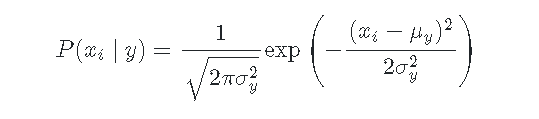

In [ ]:
Image('gauss.png')

In [ ]:
# Ajustar el clasificador en el Conjunto de Entrenamiento
from sklearn.naive_bayes import GaussianNB,MultinomialNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
classifier2 = MultinomialNB()
classifier2.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## 2.5. SVM

In [ ]:
###SVM
# Ajustar el SVM en el Conjunto de Entrenamiento
from sklearn.svm import SVC
classifierSVM= SVC(kernel = "linear", random_state = 0)
classifierSVM.fit(X_train, y_train)





SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

#. III. TESTING
Ahora evaluemos los resultados que nos arroja nuestro algoritmo y comparems con el resultado verdadero para analizar su confiabilidad.

In [ ]:
# Predicción de los resultados con el Conjunto de Testing
###GAUSSIANO
y_pred  = classifier.predict(X_test)
print(y_pred)
print(y_test)

[0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1]
[0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1]


In [ ]:
###
y_pred2  = classifier2.predict(X_test)
print(y_pred2)
print(y_test)

[0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1]
[0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1]


In [ ]:
###SVM
# Predicción de los resultados con el Conjunto de Testing con SVM
y_predSVM  = classifierSVM.predict(X_test)
print(y_predSVM)
print(y_test)

[0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1]
[0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1]


In [ ]:
# Matriz de confusión del caso Multinomial
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)
print(cm) 

[[11  2]
 [ 2 11]]


In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)



0.8076923076923077

In [ ]:
accuracy_score(y_test, y_pred2)

0.8461538461538461

In [ ]:
###SVM
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predSVM)

0.8461538461538461

# Apéndice: Método Coursera 
En este apartado modelizaremos siguiendo al curso llevado a Coursera para comprar resultados.

## Preprocesamiento

In [ ]:
barreras_reso=[]
no_barreras_reso=[]
num=0
for i in df.DECISIÓN:
    if i=="BARRERA BUROCRÁTICA": 
        a=df.EXPRESIÓN[num]
        tokens=clean_text(a)
        reso = ' '.join(tokens)
        barreras_reso.append(reso)
        num+=1    
    if i=="NO ES BARRERA BUROCRÁTICA":
        b=df.EXPRESIÓN[num]
        tokens=clean_text(b)
        reso = ' '.join(tokens)
        no_barreras_reso.append(reso)
        num+=1 
## A la fecha tenemos 9 resoluciones barreras y 9 no barreras, Dejaremos 2 para el testing, luego se aumentará la data

test_pos = barrera_tokens[7:]
train_pos = barrera_tokens[:7]
test_neg = no_barrera_tokens[7:]
train_neg = no_barrera_tokens[:7]
train_x = train_pos + train_neg
test_x = test_pos + test_neg

In [ ]:
train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)))
test_y = np.append(np.ones(len(test_pos)), np.zeros(len(test_neg)))

In [ ]:
def count_tweets(result, resos, ys):
    '''
    Input:
        result: a dictionary that will be used to map each pair to its frequency
        tweets: a list of tweets
        ys: a list corresponding to the sentiment of each tweet (either 0 or 1)
    Output:
        result: a dictionary mapping each pair to its frequency
    '''

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    for y, reso in zip(ys, resos):
            # define the key, which is the word and label tuple
            pair = (reso, y)

            # if the key exists in the dictionary, increment the count
            if pair in result:
                result[pair] += 1

            # else, if the key is new, add it to the dictionary and set the count to 1
            else:
                result[pair] = 1
    ### END CODE HERE ###

    return result

result = {}
resos = ['Hola', 'Deucht', 'Hallo', 'Hola']  ##En el original aplican el process tweet que básicamente convierne a lista
ys = [1, 0, 0,1]
count_tweets(result, resos, ys)

{('Deucht', 0): 1, ('Hallo', 0): 1, ('Hola', 1): 2}

In [ ]:
freqs = count_tweets({}, train_x, train_y)
freqs

###Continuará...


{('administrativo', 1.0): 1,
 ('categorías', 0.0): 1,
 ('conducir', 0.0): 1,
 ('desconocido', 1.0): 1,
 ('exigencia', 0.0): 1,
 ('haber', 1.0): 1,
 ('ii', 0.0): 1,
 ('licencia', 0.0): 1,
 ('operado', 1.0): 1,
 ('positivo', 1.0): 1,
 ('respecto', 1.0): 1,
 ('ser', 0.0): 1,
 ('silencio', 1.0): 1,
 ('titular', 0.0): 1}

ModuleNotFoundError: ignored

# Prueba de otros métodos de preprocesamiento de los textos

In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import re
from nltk.stem import SnowballStemmer

In [3]:
textos_originales = list(df["EXPRESIÓN CLAVE"])

In [4]:
print(textos_originales[0])

 por haber desconocido del silencio administrativo positivo que habría
operado respecto de la solicitud de licencia de funcionamiento del 16 de enero
del 2020, para operar en el giro de reciclaje y comercialización.
La razón es que a través de las citadas resoluciones la Municipalidad
desconoció el silencio administrativo positivo que operó el 30 de enero del 2020
en favor de la Asociación de recicladores “Los Buzos La Central de Arequipa”
al emitir un pronunciamiento fuera del plazo máximo de diez (10) días hábiles
con el que contaba para pronunciarse respecto de su solicitud de licencia de
funcionamiento del 16 de enero del 2020, para operar en el giro de reciclaje y
comercialización.



In [27]:
textos_procesados = []
for txt in textos_originales:
  txt_proc = txt.lower()
  txt_proc = re.sub(r'\n', ' ', txt_proc)
  txt_proc = re.sub(r's/', '', txt_proc)
  txt_proc = re.sub(r'[\.,\'\]\[\"?!“”;%\(\)/:°º¨]', '', txt_proc)
  txt_proc = re.sub(r'\d+', '', txt_proc)
  txt_proc = re.sub(r'-', ' ', txt_proc)
  txt_proc = re.sub(r' i{1,} ', ' ', txt_proc)  
  txt_proc = re.sub(r' +', ' ', txt_proc)
  txt_proc = re.sub(r' n ', ' ', txt_proc)
  txt_proc = re.sub(r' b ', ' ', txt_proc)
  txt_proc = re.sub(r'( mpy | mphcm )', ' ', txt_proc)

  textos_procesados.append(txt_proc)

In [29]:
textos_procesados[7]

'las medidas cuestionadas por la asociación de transportes de la región junín contra la municipalidad provincial de huancayo consistentes en los requisitos y exigencias para tramitar la renovación de la autorización del servicio de taxi que se detallan en el cuadro anexo de la presente resolución materializadas en el procedimiento del texto único de procedimientos administrativos tupa de la municipalidad aprobado por ordenanza municipal modificado por la ordenanza municipal y el decreto de alcaldía mpha los requisitos y exigencias antes mencionados guardan concordancia con el artículo de la ordenanza municipal publicada el de noviembre de que aprueba el reglamento complementario de administración de transporte de la municipalidad provincial de huancayo así como el artículo del decreto supremo mtc que aprueba el reglamento nacional de administración de transporte de acuerdo con lo señalado en el artículo de la ley ley general de transportes '

In [30]:
stopword_es = stopwords.words('spanish')

textos_procesados_sin_stopwords = []
for txtp in textos_procesados:
  list_words = txtp.split(' ')
  txt_proc_sin_stopwords = [word for word in list_words if word not in stopword_es]

  txt_temp = ''
  for i, tpssw in enumerate(txt_proc_sin_stopwords):
    if i != len(txt_proc_sin_stopwords) - 1:
      txt_temp += tpssw + ' '
    else:
      txt_temp += tpssw
  textos_procesados_sin_stopwords.append(txt_temp)

In [34]:
# Stemming con Snowball stemmers developed by Martin Porter
stemmer = SnowballStemmer("spanish")

textos_procesados_sin_stopwords_con_stemming = []
for txtp in textos_procesados_sin_stopwords:
  list_words = txtp.split(' ')
  txt_proc_sin_stopwords_con_stemming = [stemmer .stem(word) for word in list_words]

  txt_temp = ''
  for i, tpsswcl in enumerate(txt_proc_sin_stopwords_con_stemming):
    if i != len(txt_proc_sin_stopwords_con_stemming) - 1:
      txt_temp += tpsswcl + ' '
    else:
      txt_temp += tpsswcl
  textos_procesados_sin_stopwords_con_stemming .append(txt_temp)

In [38]:
### SELECCIONAR UN TIPO DE VECTORIZACIÓN Y PROCESAMIENTO, LUEGO EJECUTAR TODO DE NUEVO PARA OBTENER DIFERENTES COMBINACIONES
vectorizer = TfidfVectorizer()
#vectorizer = CountVectorizer()

#X = vectorizer.fit_transform(textos_procesados)
X = vectorizer.fit_transform(textos_procesados_sin_stopwords)
#X = vectorizer.fit_transform(textos_procesados_sin_stopwords_con_stemming)

y = df[['DECISIÓN']].values
labelencoder_y = LabelEncoder()  #Creamos el codificador de datos
y = labelencoder_y.fit_transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# Prueba de otros modelos de clasificación binaria

**1. Modelo de Regresión logística**

In [42]:
from sklearn.linear_model import LogisticRegression

modelo_regresion_logistica = LogisticRegression(random_state=0)
modelo_regresion_logistica.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_predicted_train = modelo_regresion_logistica.predict(X_train)
print('1. Accuracy on the train set: ', round(accuracy_score(y_train, y_predicted_train),2))

1. Accuracy on the train set:  1.0


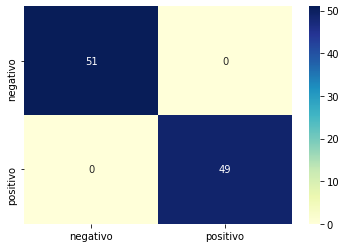

In [45]:
cm_train = confusion_matrix(y_train, y_predicted_train)
df_cm_train = pd.DataFrame(cm_train, ['negativo', 'positivo'], ['negativo', 'positivo'])

sn.heatmap(df_cm_train, annot=True, cmap="YlGnBu") # font size
plt.show()

In [46]:
y_predicted_test = modelo_regresion_logistica.predict(X_test)
print('1. Accuracy on the test set: ', round(accuracy_score(y_test, y_predicted_test),2))

1. Accuracy on the test set:  0.96


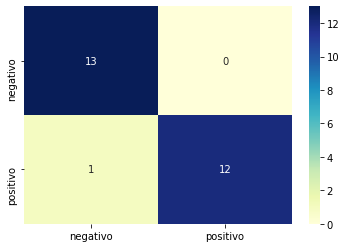

In [47]:
cm_test = confusion_matrix(y_test, y_predicted_test)
df_cm_test = pd.DataFrame(cm_test, ['negativo', 'positivo'], ['negativo', 'positivo'])

sn.heatmap(df_cm_test, annot=True, cmap="YlGnBu") # font size
plt.show()

**2. Modelo de Naive Bayes**

In [48]:
from sklearn.naive_bayes import BernoulliNB
modelo_naive_bayes = BernoulliNB()
modelo_naive_bayes.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [49]:
y_predicted_train = modelo_naive_bayes.predict(X_train)
print('1. Accuracy on the train set: ', round(accuracy_score(y_train, y_predicted_train),2))

1. Accuracy on the train set:  0.99


In [50]:
y_predicted_test = modelo_naive_bayes.predict(X_test)
print('1. Accuracy on the test set: ', round(accuracy_score(y_test, y_predicted_test),2))

1. Accuracy on the test set:  0.88


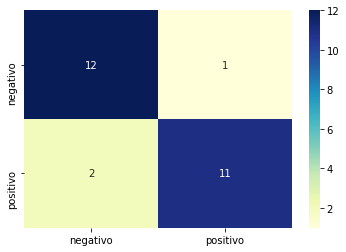

In [51]:
cm_test = confusion_matrix(y_test, y_predicted_test)
df_cm_test = pd.DataFrame(cm_test, ['negativo', 'positivo'], ['negativo', 'positivo'])

sn.heatmap(df_cm_test, annot=True, cmap="YlGnBu") # font size
plt.show()

**3. Modelo de Support Vector Machine (SVM)**

In [52]:
from sklearn import svm

modelo_svm = svm.SVC()
modelo_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [53]:
y_predicted_train = modelo_svm.predict(X_train)
print('1. Accuracy on the train set: ', round(accuracy_score(y_train, y_predicted_train),2))

1. Accuracy on the train set:  1.0


In [54]:
y_predicted_test = modelo_svm.predict(X_test)
print('1. Accuracy on the test set: ', round(accuracy_score(y_test, y_predicted_test),2))

1. Accuracy on the test set:  0.92


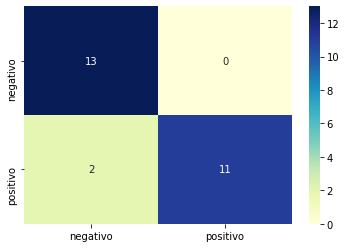

In [55]:
cm_test = confusion_matrix(y_test, y_predicted_test)
df_cm_test = pd.DataFrame(cm_test, ['negativo', 'positivo'], ['negativo', 'positivo'])

sn.heatmap(df_cm_test, annot=True, cmap="YlGnBu") # font size
plt.show()

**4. Modelo de Nu-Support Vector Classification (NuSVC)**

In [56]:
from sklearn import svm

modelo_nusvc = svm.NuSVC()
modelo_nusvc.fit(X_train, y_train)

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

In [57]:
y_predicted_train = modelo_nusvc.predict(X_train)
print('1. Accuracy on the train set: ', round(accuracy_score(y_train, y_predicted_train),2))

1. Accuracy on the train set:  1.0


In [58]:
y_predicted_test = modelo_nusvc.predict(X_test)
print('1. Accuracy on the test set: ', round(accuracy_score(y_test, y_predicted_test),2))

1. Accuracy on the test set:  0.96


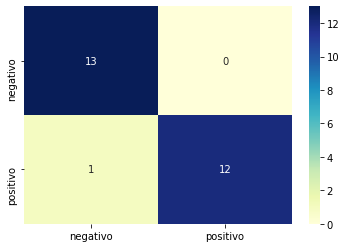

In [59]:
cm_test = confusion_matrix(y_test, y_predicted_test)
df_cm_test = pd.DataFrame(cm_test, ['negativo', 'positivo'], ['negativo', 'positivo'])

sn.heatmap(df_cm_test, annot=True, cmap="YlGnBu") # font size
plt.show()

**5. Modelo de Random Forest**

In [60]:
from sklearn.ensemble import RandomForestClassifier

modelo_random_forest = RandomForestClassifier(max_depth=20, random_state=0)
modelo_random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [61]:
y_predicted_train = modelo_random_forest.predict(X_train)
print('1. Accuracy on the test set: ', round(accuracy_score(y_train, y_predicted_train),2))

1. Accuracy on the test set:  1.0


In [62]:
y_predicted_test = modelo_random_forest.predict(X_test)
print('1. Accuracy on the test set: ', round(accuracy_score(y_test, y_predicted_test),2))

1. Accuracy on the test set:  0.92


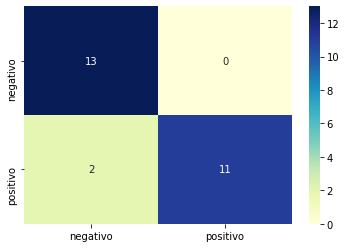

In [63]:
cm_test = confusion_matrix(y_test, y_predicted_test)
df_cm_test = pd.DataFrame(cm_test, ['negativo', 'positivo'], ['negativo', 'positivo'])

sn.heatmap(df_cm_test, annot=True, cmap="YlGnBu") # font size
plt.show()

**6. Modelo de Gradient Boosting**

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

modelo_grad_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
modelo_grad_boosting.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [65]:
y_predicted_train = modelo_grad_boosting.predict(X_train)
print('1. Accuracy on the train set: ', round(accuracy_score(y_train, y_predicted_train),2))

1. Accuracy on the train set:  1.0


In [66]:
y_predicted_test = modelo_grad_boosting.predict(X_test)
print('1. Accuracy on the test set: ', round(accuracy_score(y_test, y_predicted_test),2))

1. Accuracy on the test set:  0.92


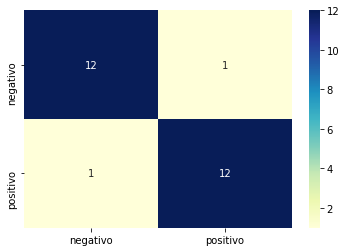

In [67]:
cm_test = confusion_matrix(y_test, y_predicted_test)
df_cm_test = pd.DataFrame(cm_test, ['negativo', 'positivo'], ['negativo', 'positivo'])

sn.heatmap(df_cm_test, annot=True, cmap="YlGnBu") # font size
plt.show()

**7. Modelo de Ada Boost**

In [68]:
from sklearn.ensemble import AdaBoostClassifier

modelo_ada_boosting = AdaBoostClassifier(n_estimators=100, random_state=0)
modelo_ada_boosting.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [69]:
y_predicted_train = modelo_ada_boosting.predict(X_train)
print('1. Accuracy on the train set: ', round(accuracy_score(y_train, y_predicted_train),2))

1. Accuracy on the train set:  1.0


In [70]:
y_predicted_test = modelo_ada_boosting.predict(X_test)
print('1. Accuracy on the test set: ', round(accuracy_score(y_test, y_predicted_test),2))

1. Accuracy on the test set:  0.92


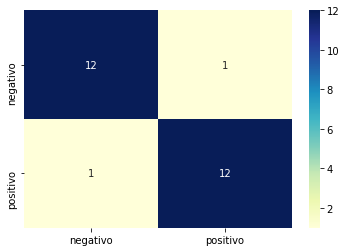

In [71]:
cm_test = confusion_matrix(y_test, y_predicted_test)
df_cm_test = pd.DataFrame(cm_test, ['negativo', 'positivo'], ['negativo', 'positivo'])

sn.heatmap(df_cm_test, annot=True, cmap="YlGnBu") # font size
plt.show()